<a href="https://colab.research.google.com/github/Claudbest1/Big-data-Management/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# New Section

In [1]:
import pandas as pd
import numpy as np

In [2]:
clicks=pd.read_csv("/content/buy-clicks.csv")

In [3]:
clicks.head(5)

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
Count=clicks.groupby('buyId').size().reset_index(name='Total')

In [6]:
Count.head(10)

,buyId,Total
0,0,592
1,1,269
2,2,714
3,3,337
4,4,425
5,5,610


In [7]:
Total=Count['Total']
buyId=Count['buyId']

In [8]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

[Text(0.5, 1.0, 'Number of times each item is purchased')]

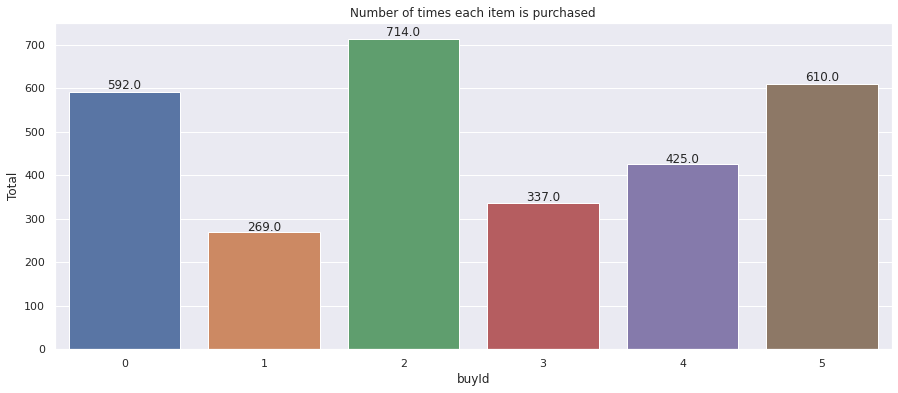

In [10]:
#Count.plot.bar(x="buyId", y="Total", rot=0, title="Number of time each item is purchased")
#ax=sns.barplot(x=buyId, y=Total, data=Count, palette='flare_r')
p=sns.barplot(x=buyId, y=Total, data=Count, ci=None)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="Number of times each item is purchased")



In [11]:
revenuePerUser = clicks.groupby('userId').sum()
revenuePerUser = revenuePerUser.reset_index()

In [12]:
revenuePerUser.head(5)

,userId,txId,userSessionId,team,buyId,price
0,1,196541,176214,891,12,21.0
1,8,166185,150134,620,19,53.0
2,9,123847,108215,582,26,80.0
3,10,268089,251947,1310,1,11.0
4,12,296419,253060,858,57,215.0


In [13]:
revenuePerUser.head(15)

,userId,txId,userSessionId,team,buyId,price
0,1,196541,176214,891,12,21.0
1,8,166185,150134,620,19,53.0
2,9,123847,108215,582,26,80.0
3,10,268089,251947,1310,1,11.0
4,12,296419,253060,858,57,215.0
5,13,190159,173738,468,13,20.0
6,15,66868,61449,148,0,2.0
7,21,142076,126330,72,10,19.0
8,26,70561,65886,346,0,2.0
9,27,75689,69194,140,2,4.0


In [14]:
rev1=revenuePerUser.iloc[:,[0,5]]

rev1
#df.sort_values(by='tweet_volume', inplace=True, ascending=False)


,userId,price
0,1,21.0
1,8,53.0
2,9,80.0
3,10,11.0
4,12,215.0
...,...,...
541,2379,27.0
542,2383,18.0
543,2384,36.0
544,2386,3.0


In [15]:
rev1.columns = ['userId', 'revenue'] #rename the columns

In [16]:
rev1.head(5)

,userId,revenue
0,1,21.0
1,8,53.0
2,9,80.0
3,10,11.0
4,12,215.0


In [17]:
rev1.sort_values(by=['revenue'], inplace=True,ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
rev1

,userId,revenue
504,2229,223.0
4,12,215.0
107,471,202.0
115,511,200.0
227,1027,189.0
...,...,...
251,1112,1.0
200,937,1.0
295,1308,1.0
296,1310,1.0


In [19]:
rev2=rev1.iloc[0:5,:]
rev2

,userId,revenue
504,2229,223.0
4,12,215.0
107,471,202.0
115,511,200.0
227,1027,189.0


In [20]:
userId=rev2['userId']
revenue=rev2['revenue']

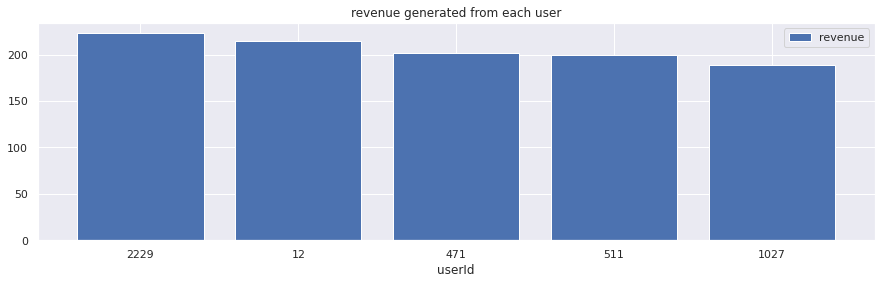

In [21]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
  rev2.plot.bar(x="userId", y="revenue", rot=0, width=0.8,figsize=(15,4), title="revenue generated from each user")
  plt.show()

In [22]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + int(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

[Text(0.5, 1.0, 'revenue generated from each user')]

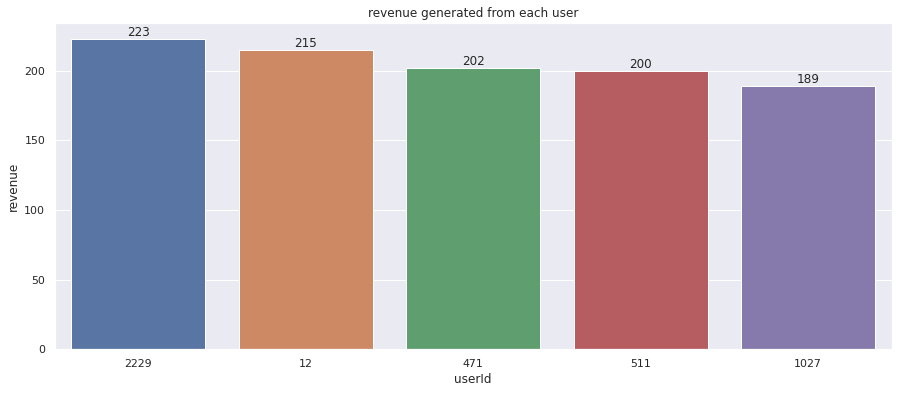

In [23]:
p=sns.barplot(x=userId, y=revenue, data=rev2, ci=None,order=rev2.sort_values('revenue', ascending=False).userId)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="revenue generated from each user")

In [24]:
RevenueItem=clicks.groupby('buyId').sum().reset_index()

In [25]:
RevenueItem

,buyId,txId,userSessionId,team,userId,price
0,0,15071080,13546442,42962,710892,592.0
1,1,6790676,6095271,18472,317670,538.0
2,2,18165871,16252202,50301,820870,2142.0
3,3,8447044,7605052,23545,411539,1685.0
4,4,11222443,10154777,30129,526393,4250.0
5,5,15283439,13787621,41821,712078,12200.0


In [26]:
revItem=RevenueItem.iloc[:,[0,5]]

revItem

,buyId,price
0,0,592.0
1,1,538.0
2,2,2142.0
3,3,1685.0
4,4,4250.0
5,5,12200.0


In [27]:
revItem.columns = ['ItemId(buyId)', 'revenue'] #rename the columns

In [28]:
revItem.sort_values(by=['revenue'], inplace=True,ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [29]:
revItem2=revItem.iloc[0:6,:]
revItem2

,ItemId(buyId),revenue
5,5,12200.0
4,4,4250.0
2,2,2142.0
3,3,1685.0
0,0,592.0
1,1,538.0


In [30]:
ItemId_buyId=revItem2['ItemId(buyId)']
revenue=revItem2['revenue']

[Text(0.5, 1.0, 'revenue generated from each items')]

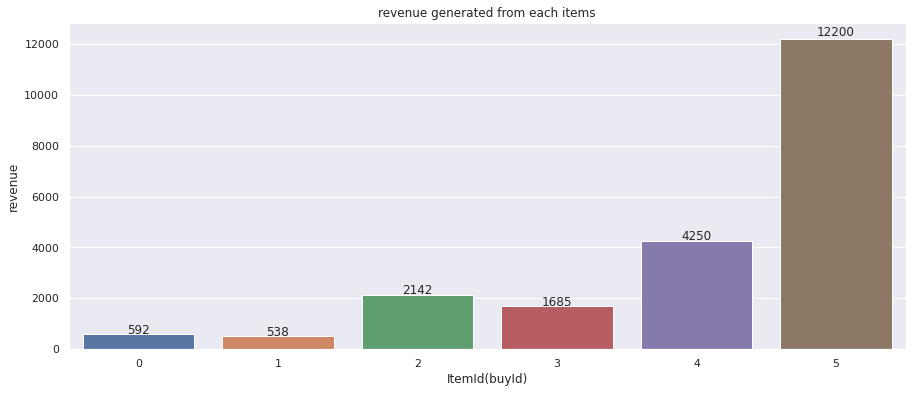

In [31]:
p=sns.barplot(x=ItemId_buyId, y=revenue, data=revItem2, ci=None)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="revenue generated from each items")

In [33]:
user_session=pd.read_csv("/content/user-session.csv")

In [ ]:
user_session.head(5)

,timestamp,userSessionId,userId,teamId,assignmentId,sessionType,teamLevel,platformType
0,2016-05-26 14:47:30,5675,170,90,5423,start,1,iphone
1,2016-05-27 00:06:54,5675,170,90,5423,end,1,iphone
2,2016-05-26 14:43:09,5795,835,39,5300,start,1,android
3,2016-05-27 08:06:54,5795,835,39,5300,end,1,android
4,2016-05-26 14:47:20,5833,624,2,5529,start,1,iphone


In [34]:
user_session.drop("timestamp", axis=1, inplace=True)

# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
df=pd.read_csv("/content/combined-data1.csv")

In [93]:
df.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0


In [94]:
df1=df.dropna()

In [95]:
df1.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0


In [96]:
newCombined=df1.groupby(['userId','avg_price']).sum().reset_index()

In [97]:
newCombined.head(20)

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId
0,1,2.00,39651,11,194,30,4.0
1,1,2.50,21014,6,120,11,2.0
2,1,3.00,10041,3,93,9,2.0
3,8,11.00,27918,5,182,23,3.0
4,9,10.00,21897,6,108,12,2.0
5,9,15.00,43159,12,204,21,4.0
6,10,1.00,64088,8,1630,174,5.0
7,10,1.50,24461,4,456,50,2.0
8,12,10.00,9914,3,90,8,1.0
9,12,11.00,20829,6,95,12,2.0


In [98]:
newCombined1=df1.groupby('platformType').size().reset_index(name='Total')

In [99]:
newCombined1.head()

,platformType,Total
0,android,513
1,iphone,555
2,linux,96
3,mac,44
4,windows,203


In [100]:
platformType=newCombined1['platformType']
Total=newCombined1['Total']
explode=[0,0,0,0.1,0]

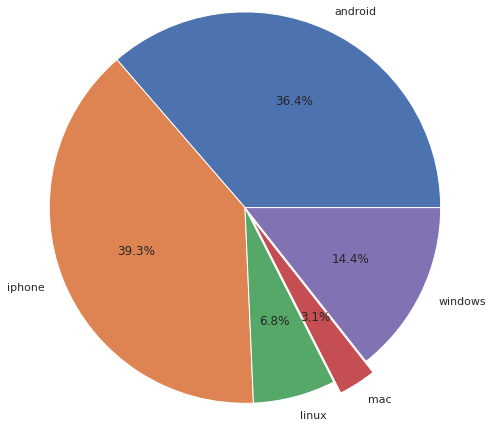

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot = newCombined1.plot.pie(y='Total', figsize=(7, 7), title='platformType',labels=platformType,autopct='%2.1f%%')
plt.pie(Total, labels = platformType,radius=1.5, autopct='%2.1f%%', explode=explode)
plt.show()

In [102]:
newCombined['hit_ratio']=(newCombined['count_hits']/newCombined['count_gameclicks'])*100

In [103]:
newCombined.head(15)

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio
0,1,2.00,39651,11,194,30,4.0,15.463918
1,1,2.50,21014,6,120,11,2.0,9.166667
2,1,3.00,10041,3,93,9,2.0,9.677419
3,8,11.00,27918,5,182,23,3.0,12.637363
4,9,10.00,21897,6,108,12,2.0,11.111111
5,9,15.00,43159,12,204,21,4.0,10.294118
6,10,1.00,64088,8,1630,174,5.0,10.674847
7,10,1.50,24461,4,456,50,2.0,10.964912
8,12,10.00,9914,3,90,8,1.0,8.888889
9,12,11.00,20829,6,95,12,2.0,12.631579


In [104]:
newCombined.sort_values(by=['hit_ratio'], inplace=True,ascending=False)

In [105]:
newCombined.head(5)

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio
880,1954,2.00,25617,6,13,5,2.0,38.461538
170,378,20.00,33248,7,6,2,1.0,33.333333
349,867,11.67,26666,7,101,28,3.0,27.722772
564,1294,5.50,25003,6,15,4,2.0,26.666667
474,1097,7.50,31614,6,107,27,2.0,25.233645


In [106]:
#team_level=df1.groupby('teamLevel').size().reset_index()
team_level = df1.groupby(['userId','teamLevel']).agg({'count_gameclicks': 'sum', 'count_hits': 'sum','avg_price':'sum'}).reset_index()

In [107]:
team_level.head(7)

,userId,teamLevel,count_gameclicks,count_hits,avg_price
0,1,3,93,9,3.0
1,1,4,88,14,2.0
2,1,6,120,11,2.5
3,1,7,106,16,2.0
4,8,5,182,23,11.0
5,9,2,17,1,10.0
6,9,4,91,11,10.0


In [108]:
hit_rate=team_level['hit_rate']=((team_level['count_hits']/team_level['count_gameclicks'])*100)

In [109]:
team_level.head(25)

,userId,teamLevel,count_gameclicks,count_hits,avg_price,hit_rate
0,1,3,93,9,3.00,9.677419
1,1,4,88,14,2.00,15.909091
2,1,6,120,11,2.50,9.166667
3,1,7,106,16,2.00,15.094340
4,8,5,182,23,11.00,12.637363
5,9,2,17,1,10.00,5.882353
6,9,4,91,11,10.00,12.087912
7,9,5,98,8,15.00,8.163265
8,9,7,106,13,15.00,12.264151
9,10,1,561,64,1.00,11.408200


In [114]:
team_level1 = df1.groupby(['teamLevel']).sum().reset_index()

In [115]:
team_level1.head()

,teamLevel,userId,userSessionId,count_gameclicks,count_hits,count_buyId,avg_price
0,1,89139,702976,12859,1392,99.0,585.00
1,2,132452,1143025,19005,2095,143.0,730.67
2,3,175453,1954793,21490,2387,209.0,1017.25
3,4,253413,3103297,32786,3757,305.0,1378.84
4,5,325371,4986161,40821,4581,453.0,1999.69


[Text(0.5, 1.0, 'number of clicks per level')]

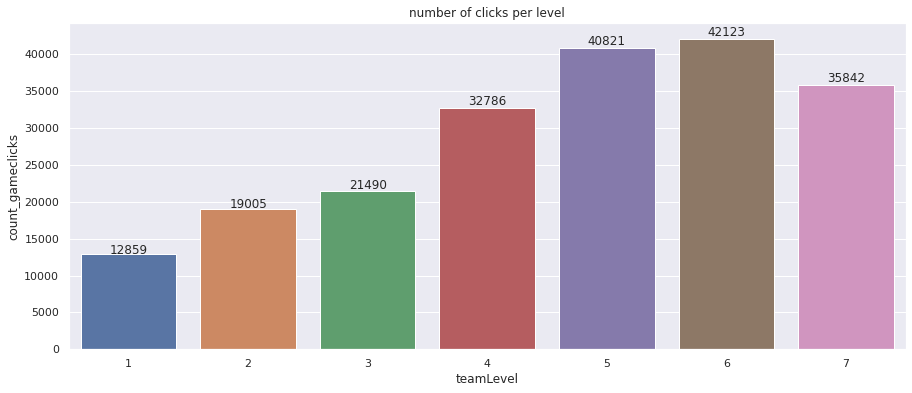

In [116]:
teamLevel=team_level1['teamLevel']
count_gameclick=team_level1['count_gameclicks']
p=sns.barplot(x=teamLevel, y=count_gameclick,data=team_level1, ci=None,)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="number of clicks per level")

[Text(0.5, 1.0, 'amount spent in each level')]

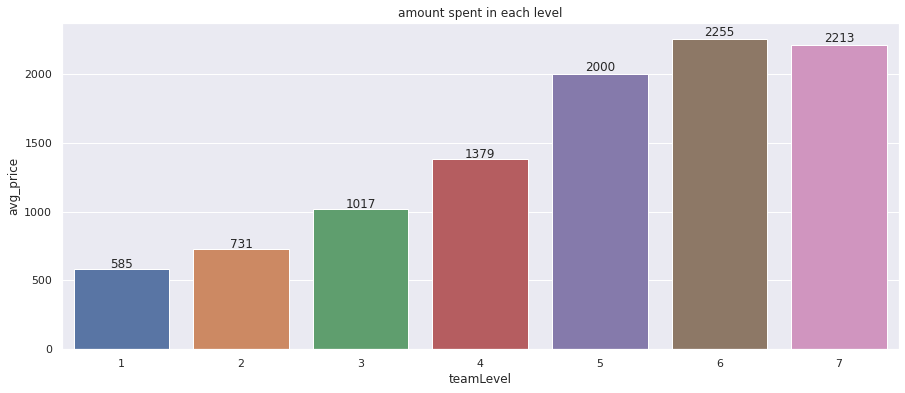

In [117]:
teamLevel=team_level1['teamLevel']
avg_price=team_level1['avg_price']
p=sns.barplot(x=teamLevel, y=avg_price,data=team_level, ci=None,)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="amount spent in each level")

In [118]:
newCombined.head()

,userId,avg_price,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,hit_ratio
880,1954,2.00,25617,6,13,5,2.0,38.461538
170,378,20.00,33248,7,6,2,1.0,33.333333
349,867,11.67,26666,7,101,28,3.0,27.722772
564,1294,5.50,25003,6,15,4,2.0,26.666667
474,1097,7.50,31614,6,107,27,2.0,25.233645


In [ ]:
newCombined.round({"hit_ratio":1})

,userId,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,avg_price,hit_ratio
75,378,33248,7,6,2,1.0,20.0,33.3
189,981,38321,6,36,9,1.0,10.0,25.0
406,1948,26463,7,59,13,1.0,1.0,22.0
109,526,31368,7,41,8,2.0,20.0,19.5
352,1713,31474,7,50,9,2.0,1.0,18.0
...,...,...,...,...,...,...,...,...
93,439,20783,6,156,9,2.0,12.5,5.8
442,2153,28710,5,100,5,1.0,10.0,5.0
472,2283,12474,4,22,1,1.0,5.0,4.5
51,265,32590,7,76,2,1.0,5.0,2.6


In [ ]:
newCombined.sort_values(by=['hit_ratio'], inplace=True,ascending=False)

In [ ]:
aa=newCombined.round({"hit_ratio":1})

In [ ]:
aa['hit_ratio(%)']=aa['hit_ratio'].astype(str)+'%'

In [ ]:
aa.head()

,userId,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,avg_price,hit_ratio,hit_ratio(%)
75,378,33248,7,6,2,1.0,20.0,33.3,33.3%
189,981,38321,6,36,9,1.0,10.0,25.0,25.0%
406,1948,26463,7,59,13,1.0,1.0,22.0,22.0%
109,526,31368,7,41,8,2.0,20.0,19.5,19.5%
352,1713,31474,7,50,9,2.0,1.0,18.0,18.0%


In [ ]:
aa_ten=aa.iloc[:10,[0,7]]


In [ ]:
aa_ten.head()

,userId,hit_ratio
75,378,33.3
189,981,25.0
406,1948,22.0
109,526,19.5
352,1713,18.0


[Text(0.5, 1.0, 'user hit ratio')]

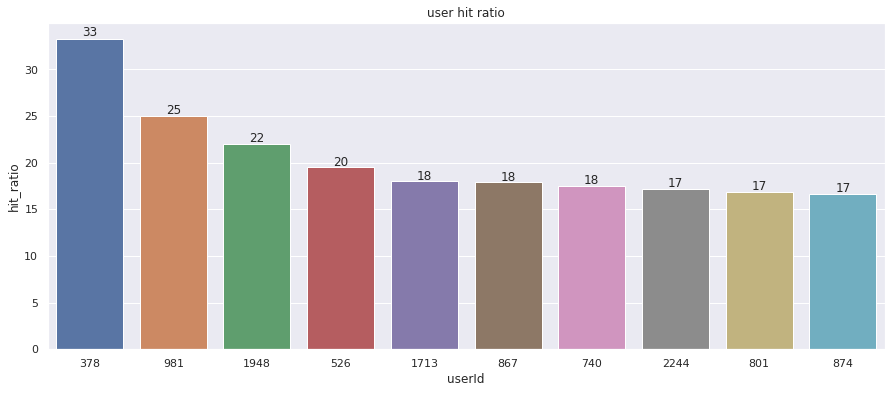

In [ ]:
userId=aa_ten['userId']
hit_ratio=aa_ten['hit_ratio']
p=sns.barplot(x=userId, y=hit_ratio,data=aa_ten, ci=None,order=aa_ten.sort_values('hit_ratio', ascending=False).userId)
sns.set(rc = {'figure.figsize':(15,6)})
show_values(p)
p.set(title="user hit ratio")

In [ ]:
df1.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0


In [ ]:
dataGrouped=df1.groupby(['userId','teamLevel']).sum().reset_index()

In [ ]:
dataGrouped.head(10)

,userId,teamLevel,userSessionId,count_gameclicks,count_hits,count_buyId,avg_price
0,1,3,10041,93,9,2.0,3.0
1,1,4,12713,88,14,2.0,2.0
2,1,6,21014,120,11,2.0,2.5
3,1,7,26938,106,16,2.0,2.0
4,8,5,27918,182,23,3.0,11.0
5,9,2,9187,17,1,1.0,10.0
6,9,4,12710,91,11,1.0,10.0
7,9,5,16228,98,8,2.0,15.0
8,9,7,26931,106,13,2.0,15.0
9,10,1,16583,561,64,3.0,1.0
